In [1]:
import random
import math, numpy as np
from typing import List, Optional, Dict, Tuple
from enum import Enum
import pandas as pd
import uuid
from datetime import datetime

Configuration:
population_size: 40000
annual_incidence_rate: 0.05
num_years: 2
include_mortality: True
annual_mortality_rate: 0.01
age_distribution: True
initial_age_range: [30, 70]
simulation_id: sim_20250222_174432_7cb789fa

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   person_id      40000 non-null  int64  
 1   had_stroke     40000 non-null  bool   
 2   stroke_month   3909 non-null   float64
 3   is_alive       40000 non-null  bool   
 4   age            40000 non-null  int64  
 5   risk_scores    40000 non-null  object 
 6   simulation_id  40000 non-null  object 
dtypes: bool(2), float64(1), int64(2), object(2)
memory usage: 1.6+ MB


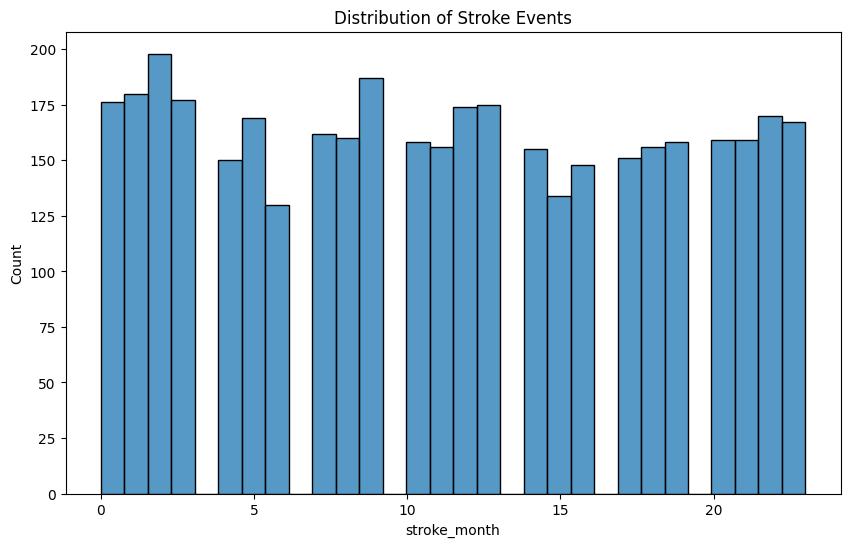

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the pickle file
results = pd.read_pickle('../simulation_results_sim_20250222_174432_7cb789fa.pkl')

# Access configuration and data
config = results['config']
df = results['data']

# Display basic information
print("Configuration:")
for key, value in config.items():
    print(f"{key}: {value}")

print("\nDataFrame Info:")
df.info()

# Basic visualization
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='stroke_month', bins=30)
plt.title('Distribution of Stroke Events')
plt.show()

In [3]:
df.head()

,person_id,had_stroke,stroke_month,is_alive,age,risk_scores,simulation_id
0,0,False,NaN,True,32,"[3.6577170840955205e-05, 0.8740260942705084, 0...",sim_20250222_174432_7cb789fa
1,1,False,NaN,True,34,"[2.822762159326099e-09, 3.4154897398661166e-07...",sim_20250222_174432_7cb789fa
2,2,False,NaN,True,40,"[0.014297189784442207, 1.61285049589344e-14, 1...",sim_20250222_174432_7cb789fa
3,3,False,NaN,True,44,"[3.197853279215986e-08, 0.02684820401057027, 0...",sim_20250222_174432_7cb789fa
4,4,False,NaN,True,39,"[0.001269774205617243, 1.9962466962013093e-06,...",sim_20250222_174432_7cb789fa


In [13]:
# Load the pickle file
results = pd.read_pickle('../simulation_results_sim_20250222_180235_a705aa86.pkl')

# Access configuration and data
config = results['config']
df = results['data']

In [14]:
config

{'population_size': 40000,
 'annual_incidence_rate': 0.05,
 'num_years': 2,
 'include_mortality': True,
 'annual_mortality_rate': 0.01,
 'age_distribution': True,
 'initial_age_range': [30, 70],
 'simulation_id': 'sim_20250222_180235_a705aa86'}

In [21]:
results = pd.read_pickle('../month_10_analysis.pkl')
results.head(250)

,Simulation Month,Person ID,predicted risk score,stroke risk,Had_stroke_within_12_months,Stroke Month,is_alive,age,PPV,Sensitivity
2266,10,2266,0.999995,0.004265,True,21.0,True,70,0.836,0.111526
3245,10,3245,0.999982,0.004265,True,17.0,True,54,0.836,0.111526
10297,10,10297,0.999980,0.004265,True,15.0,True,69,0.836,0.111526
35423,10,35423,0.999976,0.004265,True,12.0,True,67,0.836,0.111526
18407,10,18407,0.999975,0.004265,True,20.0,True,67,0.836,0.111526
...,...,...,...,...,...,...,...,...,...,...
33678,10,33678,0.984036,0.004265,True,14.0,True,56,0.836,0.111526
4955,10,4955,0.984007,0.004265,False,NaN,True,35,0.836,0.111526
14493,10,14493,0.983870,0.004265,True,15.0,True,35,0.836,0.111526
37985,10,37985,0.983825,0.004265,True,16.0,True,31,0.836,0.111526


,Simulation Month,Person ID,predicted risk score,stroke risk,Had_stroke_within_12_months,Stroke Month,is_alive,age,PPV,Sensitivity
17577,0,17577,0.999993,0.004265,True,8.0,True,63,0.82,0.103223
30751,0,30751,0.999993,0.004265,True,2.0,True,45,0.82,0.103223
6359,0,6359,0.999979,0.004265,True,5.0,True,53,0.82,0.103223
11221,0,11221,0.999974,0.004265,True,6.0,True,46,0.82,0.103223
18465,0,18465,0.999967,0.004265,True,6.0,True,53,0.82,0.103223
...,...,...,...,...,...,...,...,...,...,...
39785,0,39785,NaN,0.004265,False,NaN,False,57,0.82,0.103223
39823,0,39823,NaN,0.004265,False,NaN,False,33,0.82,0.103223
39833,0,39833,NaN,0.004265,False,NaN,False,57,0.82,0.103223
39859,0,39859,NaN,0.004265,False,NaN,False,45,0.82,0.103223
